# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Copied from 11.2.5
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Copied from 11.2.5
# Open a Chrome window using Splinter
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Save the HTML from the browser
html = browser.html

# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find("table", {"class":"table"})
marsdfs = pd.read_html(str(table))
marsdf = marsdfs[0]
marsdf.head()

/var/folders/7s/yj1x048507x6rv5qp0nlrsp00000gn/T/ipykernel_50452/2161328150.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  marsdfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list


# Loop through the scraped data to create a list of rows


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
marsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
marsdf['terrestrial_date'] = pd.to_datetime(marsdf['terrestrial_date'])
marsdf.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
# Confirm type changes were successful by examining data types again
marsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
marsdf.month.nunique()

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
marsdf.sol.count()

1867

In [14]:
# 3. What is the average minimum temperature by month?
marsdf.groupby('month').min_temp.mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

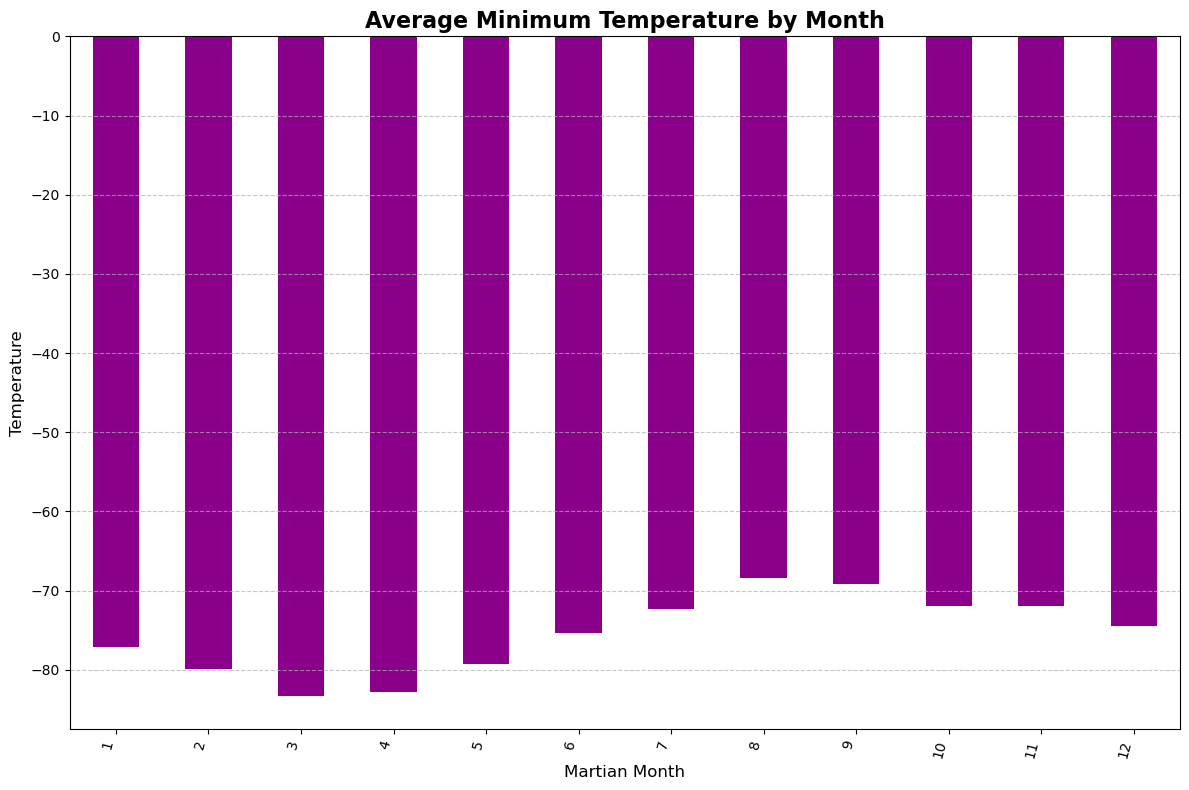

In [15]:
# Plot the average minimum temperature by month

# Sort the data 
tempdata = marsdf.groupby('month').min_temp.mean()

# Plot the data
plt.figure(figsize=(12, 8))  
tempdata.plot(kind='bar', color='darkmagenta')

# Add titles and labels
plt.title("Average Minimum Temperature by Month", fontsize=16, fontweight="bold")
plt.xlabel("Martian Month", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.xticks(rotation=75, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  
plt.show()

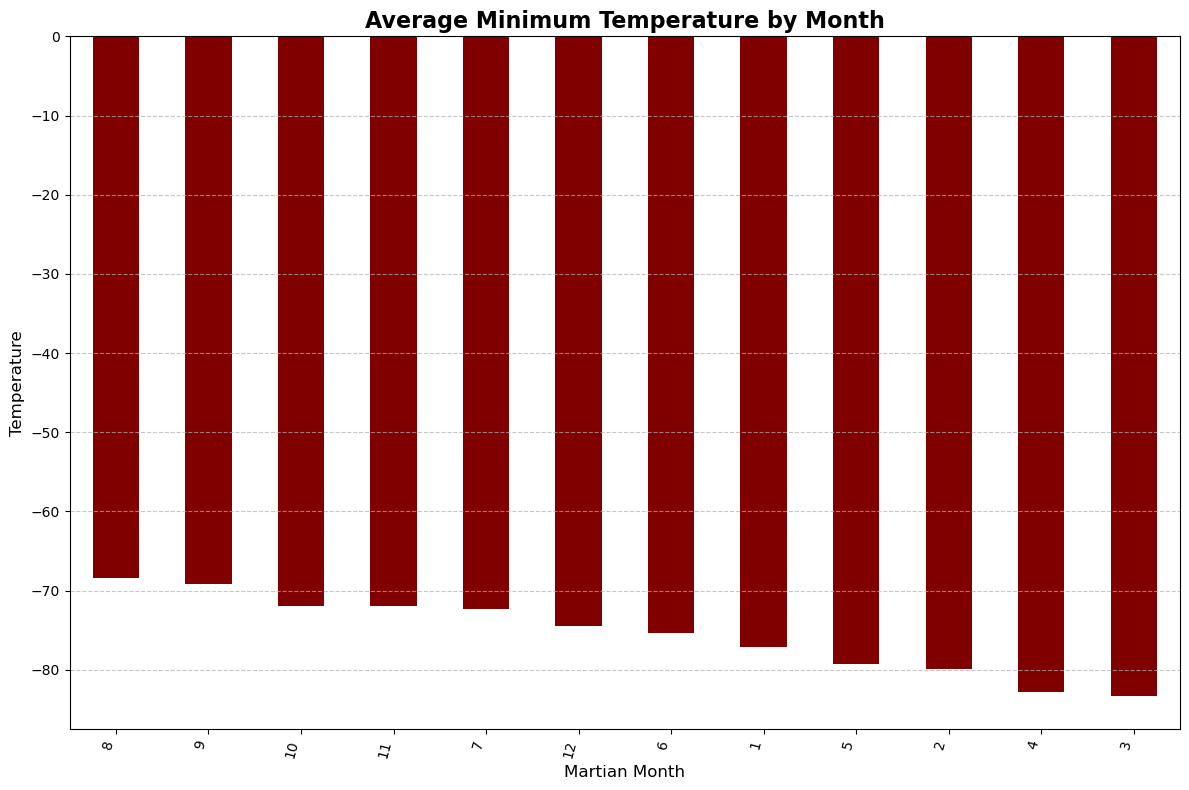

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the data 
tempdata = marsdf.groupby('month').min_temp.mean().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))  
tempdata.plot(kind='bar', color='maroon')

# Add titles and labels
plt.title("Average Minimum Temperature by Month", fontsize=16, fontweight="bold")
plt.xlabel("Martian Month", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.xticks(rotation=75, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  
plt.show()

In [22]:
# 4. What is the average pressure by month?
marsdf.groupby('month')['pressure'].mean()

# d	terrestrial_date	sol	ls	month	min_temp	pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

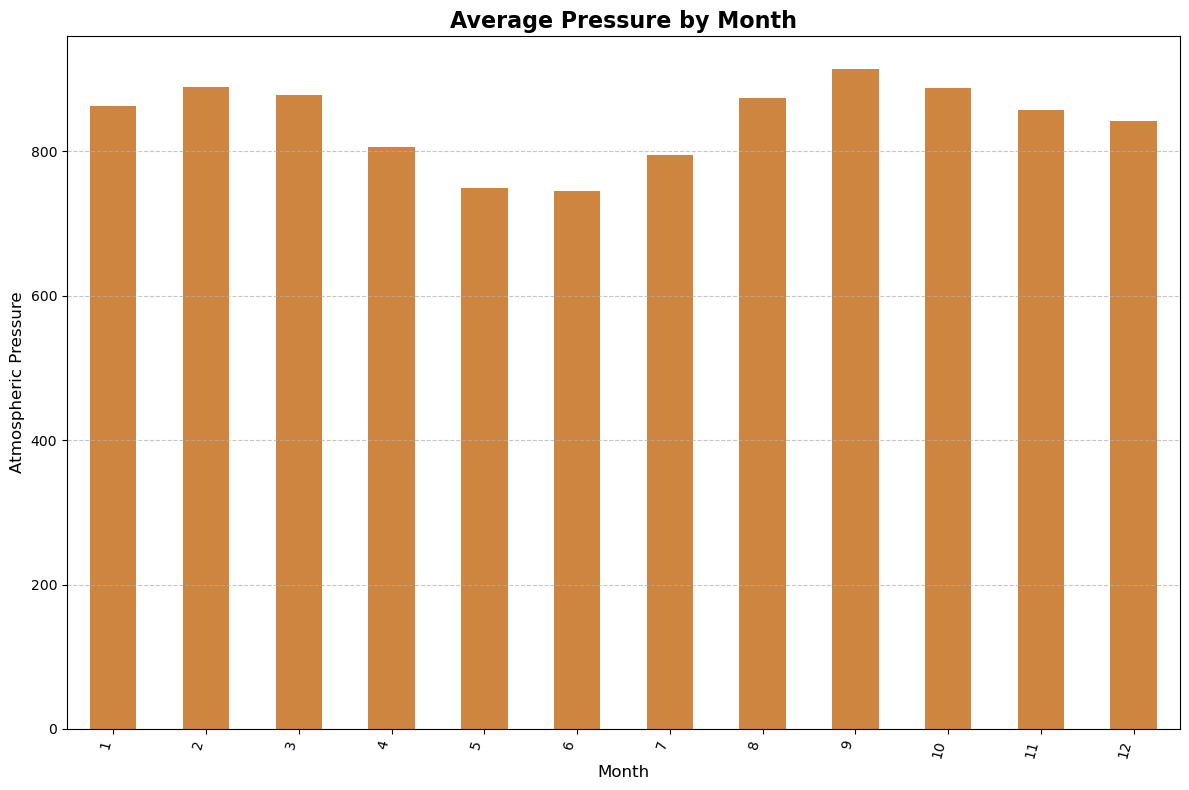

In [24]:
# Plot the average pressure by month

# Sort the data 
avg_pressure_by_month = marsdf.groupby('month')['pressure'].mean()

# Plot the data
plt.figure(figsize=(12, 8))  
avg_pressure_by_month.plot(kind='bar', color='peru')

# Add titles and labels
plt.title("Average Pressure by Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Atmospheric Pressure", fontsize=12)
plt.xticks(rotation=75, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  
plt.show()

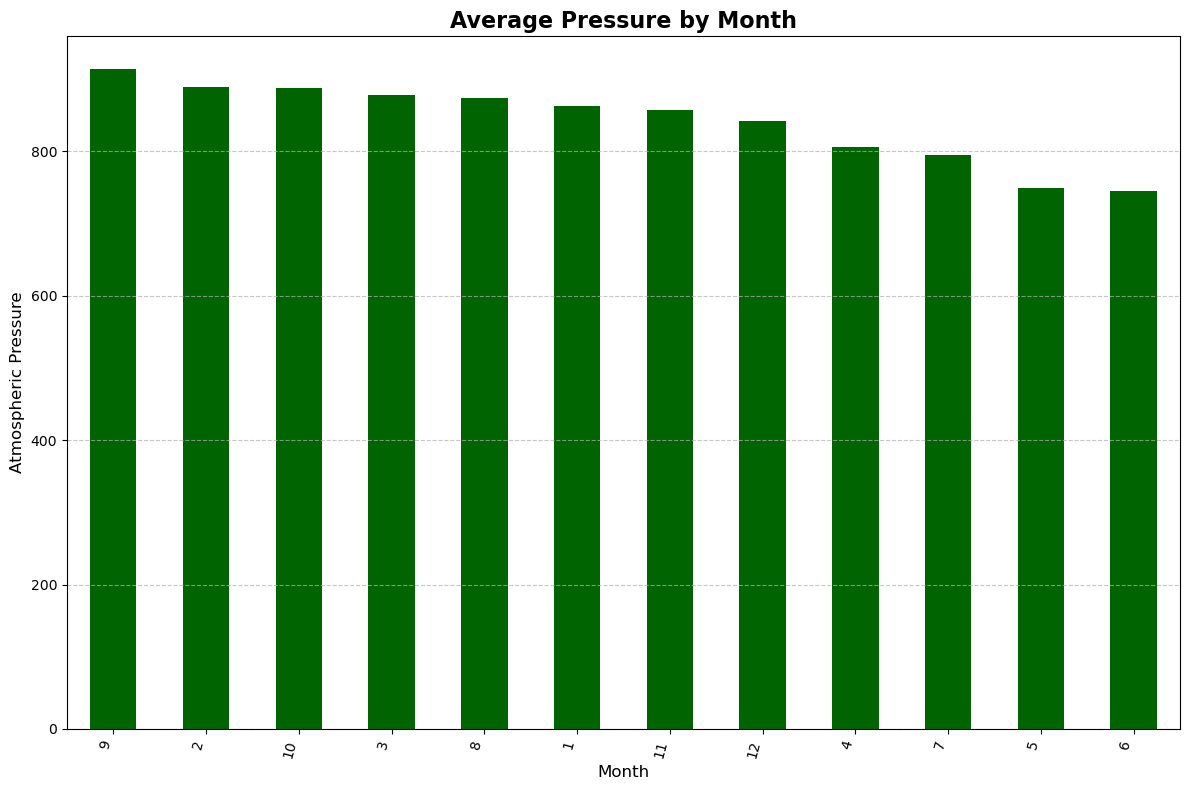

In [25]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the data 
avg_pressure_by_month = marsdf.groupby('month')['pressure'].mean().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))  
avg_pressure_by_month.plot(kind='bar', color='darkgreen')

# Add titles and labels
plt.title("Average Pressure by Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Atmospheric Pressure", fontsize=12)
plt.xticks(rotation=75, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()  
plt.show()

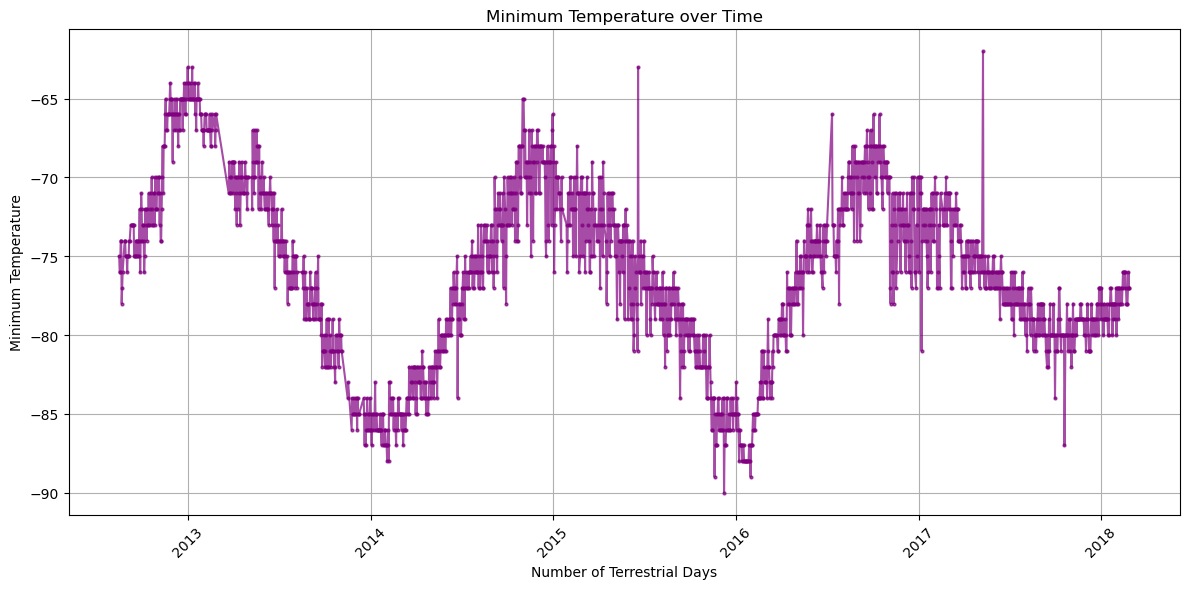

In [28]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Sort the data 
marsdf = marsdf.sort_values('terrestrial_date')

# Plot daily minimum temperature
plt.figure(figsize=(12, 6))
plt.plot(marsdf['terrestrial_date'], marsdf['min_temp'], color='purple', marker='o', linestyle='-', markersize=2, alpha=0.7)

# Formatting the plot
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Show the chart
plt.tight_layout()  
plt.show()

#### Minimum Temperature

Based on the graph depicting the minimum temperature it is clear that there is a season trend in temperatures. Months 3, 4, and 2 seem to have the lowest temperatures of the year. On the opposite side of the spectrum are months 8 and 9 being the warmest months of the year on Mars. 

#### Atmospheric Pressure

After observing the graph for the atmospheric pressure there is a seasonal cycle with the pressure just as there is with the temperature. The highest atmospheric pressure occurs during month 9 while the lowest pressure occurs during month 6. 

#### Year Length

Again, very similarily to the temperature and pressure there is also a seasonal cycle that occur every 1.9 Earth years, roughly. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
marsdf.to_csv("mars_data.csv", index=False)

In [30]:
browser.quit()